<a href="https://colab.research.google.com/github/hyeonjun/Python_Data_Analysis/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* webbrowser :  웹 페이지 접속, open() / open_new() 단, 전달값은 http~
* requests : html 소스 읽기, get() 단 전달값은 http~
* bs4의 BeautifulSoup : html 소스로부터 필요 데이터 검색, 추출. BeautifulSoup 클래스의 생성자에게 html 소수와 'lxml'과 같은 분석 형식 전달

In [1]:
import webbrowser

url = 'www.naver.com'

In [2]:
webbrowser.open(url)
webbrowser.open_new(url) # 새 창으로 접속(새 탭)

False

In [3]:
# https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC
# 검색주소: https://search.naver.com/search.naver?
# 검색어 : query=
naver_search_url = 'https://search.naver.com/search.naver?query='
search_word = '파이썬'
webbrowser.open_new(naver_search_url+search_word)

False

In [4]:
# html 페이지 소스 요청 : request의 get()
import requests

In [5]:
r = requests.get('http://www.naver.com')
r

<Response [200]>

In [6]:
r.text[:100]

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="u'

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
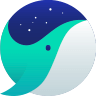
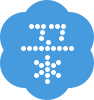

In [7]:
r = requests.get('http://www.naver.com').text
r

In [8]:
html = """
    <html><body><div><span>
    <a href="http://www.naver.com">네이버</a>
    <a href="http://www.daum.com">다음</a>
    <a href="http://www.google.com">구글</a>
    </span></div></body></html>
"""

In [9]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'lxml')

In [10]:
# 태그명 찾기 : BeautifulSoup 객체.find('검색태그명')
soup.find('a')

<a href="http://www.naver.com">네이버</a>

In [11]:
# 태그명 검색 후, 시각태그와 닫는 태그 사이 텍스트 추출
soup.find('a').get_text()

'네이버'

In [12]:
# 지정한 모든 태그 검색 : BeautifulSoup 객체.find_all('검색태그명')
soup.find_all('a')

[<a href="http://www.naver.com">네이버</a>,
 <a href="http://www.daum.com">다음</a>,
 <a href="http://www.google.com">구글</a>]

In [13]:
html2 = """
<html>
 <head>
  <title>작품과 작가 모음</title>
 </head>
 <body>
  <h1>책 정보</h1>
  <p id="book_title">토지</p>
  <p id="author">박경리</p>
  
  <p id="book_title">태백산맥</p>
  <p id="author">조정래</p>

  <p id="book_title">감옥으로부터의 사색</p>
  <p id="author">신영복</p>
 </body>
</html>
"""

In [14]:
# lxml : html 문서를 파싱하기 위한 분석기
soup2 = BeautifulSoup(html2, 'lxml')

In [15]:
# prettify() : html 구조 형태로 정리해서 출력
print(soup2.prettify())

<html>
 <head>
  <title>
   작품과 작가 모음
  </title>
 </head>
 <body>
  <h1>
   책 정보
  </h1>
  <p id="book_title">
   토지
  </p>
  <p id="author">
   박경리
  </p>
  <p id="book_title">
   태백산맥
  </p>
  <p id="author">
   조정래
  </p>
  <p id="book_title">
   감옥으로부터의 사색
  </p>
  <p id="author">
   신영복
  </p>
 </body>
</html>



In [16]:
# 태그명 직접 이용
soup2.title

<title>작품과 작가 모음</title>

In [17]:
soup2.body.h1

<h1>책 정보</h1>

In [18]:
soup2.find_all('p')

[<p id="book_title">토지</p>,
 <p id="author">박경리</p>,
 <p id="book_title">태백산맥</p>,
 <p id="author">조정래</p>,
 <p id="book_title">감옥으로부터의 사색</p>,
 <p id="author">신영복</p>]

In [19]:
soup2.find('p')

<p id="book_title">토지</p>

In [20]:
soup2.find('p', {'id':'book_title'})

<p id="book_title">토지</p>

In [21]:
soup2.find('p', {'id':'author'})

<p id="author">박경리</p>

In [22]:
soup2.find_all('p', {'id':'book_title'})

[<p id="book_title">토지</p>,
 <p id="book_title">태백산맥</p>,
 <p id="book_title">감옥으로부터의 사색</p>]

In [23]:
soup2.find_all('p', {'id':'author'})

[<p id="author">박경리</p>, <p id="author">조정래</p>, <p id="author">신영복</p>]

In [24]:
boot_titles = soup2.find_all('p', {'id':'book_title'})
authors = soup2.find_all('p', {'id':'author'})
print(boot_titles)
authors

[<p id="book_title">토지</p>, <p id="book_title">태백산맥</p>, <p id="book_title">감옥으로부터의 사색</p>]


[<p id="author">박경리</p>, <p id="author">조정래</p>, <p id="author">신영복</p>]

In [25]:
for title, author in zip(boot_titles, authors):
    print(title.get_text(),":",author.get_text())

토지 : 박경리
태백산맥 : 조정래
감옥으로부터의 사색 : 신영복


In [26]:
# BeatifulSoup 객체.select()
soup2.select('body h1')

[<h1>책 정보</h1>]

In [27]:
# select('부모태그명 자식태그명')
soup2.select('body p')

[<p id="book_title">토지</p>,
 <p id="author">박경리</p>,
 <p id="book_title">태백산맥</p>,
 <p id="author">조정래</p>,
 <p id="book_title">감옥으로부터의 사색</p>,
 <p id="author">신영복</p>]

In [28]:
# selct('태그명#id명') / selct('태그명.class명')
soup2.select('p#book_title')

[<p id="book_title">토지</p>,
 <p id="book_title">태백산맥</p>,
 <p id="book_title">감옥으로부터의 사색</p>]

In [29]:
# 외부 html을 로드
f = open('/content/drive/MyDrive/Encore/데이터분석/data3/HTML_example_my_site.html', encoding='utf-8')

In [30]:
# file 객체의 read()를 이용하여 읽기
html_source = f.read()

In [31]:
f.close()

In [32]:
soup3 = BeautifulSoup(html_source, 'lxml')
soup3

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<title>사이트 모음</title>
</head>
<body>
<p id="title"><b>자주 가는 사이트 모음</b></p>
<p id="contents">이곳은 자주 가는 사이트를 모아둔 곳입니다.</p>
<a class="portal" href="http://www.naver.com" id="naver">네이버</a> <br/>
<a class="search" href="https://www.google.com" id="google">구글</a> <br/>
<a class="portal" href="http://www.daum.net" id="daum">다음</a> <br/>
<a class="government" href="http://www.nl.go.kr" id="nl">국립중앙도서관</a>
</body>
</html>

In [33]:
soup3.select('a.portal')

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>,
 <a class="portal" href="http://www.daum.net" id="daum">다음</a>]

In [34]:
soup3.select('a#nl')

[<a class="government" href="http://www.nl.go.kr" id="nl">국립중앙도서관</a>]

BeautifulSoup 객체를 이용한 HTML 소스 분석 방법

1. BeautifulSoup 객체 생성 : BeautifulSoup(html소스, 'lxml')
2. 검색방법
    * 객체.find('검색 태그명') : 처음 검색된 태그만 문자열로 반환
    * 객체.find_all('검색 태그명') : 검색된 모든 태그 리스트로 반환
    * 객체.find('검색 태그명', {'id':'id명'}) : 검색된 태그 중 id에 해당하는 처음 값만 문자열로 반환
    * 객체.find_all('검색 태그명', {'id':'id명'})) : 검색된 태그 중 id에 해당하는 모든 태그값들을 리스트로 반환
    * 객체.find('검색 태그명', {'class':'class명'}) : 검색된 태그 중 class에 해당하는 처음 값만 문자열로 반환
    * 객체.find_all('검색 태그명', {'class':'class명'})) : 검색된 태그 중 class에 해당하는 모든 태그값들을 리스트로 반환

    * 객체.get_text() : 실제 텍스트(시작 태그와 닫는 태그 사이 글자 추출)

    * 객체.태그명 : 검색된 태그를 문자열로 반환
    * 객체.상위태그명.하위태그명 : 검색된 태그를 문자열로 반환

    * 객체.select() : 리스트로 결과값 반환
    * 객체.select('태그명')
    * 객체.select('상위태그명 하위태그명')
    * 객체.select('태그명#id명')
    * 객체.select('태그명.class명')

In [35]:
f = open('/content/drive/MyDrive/Encore/데이터분석/data3/br_example_constitution.html', encoding='utf-8')
html_source = f.read()
f.close()

soup4 = BeautifulSoup(html_source, 'lxml')
soup4

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<title>줄 바꿈 테스트 예제</title>
</head>
<body>
<p id="title"><b>대한민국헌법</b></p>
<p id="content">제1조 <br/>①대한민국은 민주공화국이다.<br/>②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.</p>
<p id="content">제2조 <br/>①대한민국의 국민이 되는 요건은 법률로 정한다.<br/>②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.</p>
</body>
</html>

In [36]:
html = '<p id="content">제1조 <br/>①대한민국은 민주공화국이다.<br/>②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.</p>'
html = html.replace('<br/>', '\n')
soup5 = BeautifulSoup(html, 'lxml')
soup5

<html><body><p id="content">제1조 
①대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.</p></body></html>

In [37]:
html = '<p id="content">제1조 <br/>①대한민국은 민주공화국이다.<br/>②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.</p>'

def replace_newline(soup_html):
    br_to_newlines = soup_html.find_all('br')
    for br_to_newline in br_to_newlines:
        br_to_newline.replace_with('\n')
    return soup_html

soup6 = BeautifulSoup(html, 'lxml')
content2 = soup6.find('p', {'id':'content'})
content3 = replace_newline(soup6)
print(content3.get_text())

제1조 
①대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.


In [38]:
soup7 = BeautifulSoup(html_source, 'lxml')

title = soup7.find('p', {'id':'title'})
contents = soup7.find_all('p', {'id':'content'})

print(title.get_text(), '\n')
for content in contents:
    con = replace_newline(content)
    print(con.get_text(),'\n')

대한민국헌법 

제1조 
①대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다. 

제2조 
①대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다. 



In [39]:
# https://www.alexa.com/topsites/countries/KR 에서 데이터 가져오기
url = 'https://www.alexa.com/topsites/countries/KR'
html_website_ranking = requests.get(url).text
soup_website_ranking = BeautifulSoup(html_website_ranking, 'lxml')

In [40]:
website_ranking = soup_website_ranking.select('p a')
website_ranking

[<a href="https://support.alexa.com/hc/en-us/articles/200444340" target="_blank">this explanation</a>,
 <a href="/siteinfo/google.com">Google.com</a>,
 <a href="/siteinfo/naver.com">Naver.com</a>,
 <a href="/siteinfo/youtube.com">Youtube.com</a>,
 <a href="/siteinfo/daum.net">Daum.net</a>,
 <a href="/siteinfo/tistory.com">Tistory.com</a>,
 <a href="/siteinfo/kakao.com">Kakao.com</a>,
 <a href="/siteinfo/coupang.com">Coupang.com</a>,
 <a href="/siteinfo/tmall.com">Tmall.com</a>,
 <a href="/siteinfo/amazon.com">Amazon.com</a>,
 <a href="/siteinfo/google.co.kr">Google.co.kr</a>,
 <a href="/siteinfo/namu.wiki">Namu.wiki</a>,
 <a href="/siteinfo/netflix.com">Netflix.com</a>,
 <a href="/siteinfo/sohu.com">Sohu.com</a>,
 <a href="/siteinfo/facebook.com">Facebook.com</a>,
 <a href="/siteinfo/qq.com">Qq.com</a>,
 <a href="/siteinfo/wikipedia.org">Wikipedia.org</a>,
 <a href="/siteinfo/taobao.com">Taobao.com</a>,
 <a href="/siteinfo/jd.com">Jd.com</a>,
 <a href="/siteinfo/360.cn">360.cn</a>,
 <a

In [41]:
website_ranking_address = [element.get_text() for element in website_ranking[1:]]
website_ranking_address

['Google.com',
 'Naver.com',
 'Youtube.com',
 'Daum.net',
 'Tistory.com',
 'Kakao.com',
 'Coupang.com',
 'Tmall.com',
 'Amazon.com',
 'Google.co.kr',
 'Namu.wiki',
 'Netflix.com',
 'Sohu.com',
 'Facebook.com',
 'Qq.com',
 'Wikipedia.org',
 'Taobao.com',
 'Jd.com',
 '360.cn',
 'Microsoft.com',
 'Baidu.com',
 'Dcinside.com',
 'Instagram.com',
 '11st.co.kr',
 'Yahoo.com',
 'Office.com',
 'Adobe.com',
 'Nate.com',
 'Fmkorea.com',
 'Chosun.com',
 'Donga.com',
 'Gmarket.co.kr',
 'Sina.com.cn',
 'Twitch.tv',
 'Zoom.us',
 'Weibo.com',
 'Apple.com',
 'Danawa.com',
 'Bing.com',
 'Cafe24.com',
 'Brunch.co.kr',
 'Jobkorea.co.kr',
 'Inven.co.kr',
 'Ruliweb.com',
 'Stackoverflow.com',
 'Aliexpress.com',
 'Upbit.com',
 'Auction.co.kr',
 'Google.com.hk',
 'Amazon.co.uk']

In [42]:
print('[Top Sites in South Korea]')
for k in range(6):
    print(f'{k+1} : {website_ranking_address[k]}')

[Top Sites in South Korea]
1 : Google.com
2 : Naver.com
3 : Youtube.com
4 : Daum.net
5 : Tistory.com
6 : Kakao.com


In [43]:
# 검색 결과 데이터를 데이터프레임으로
import pandas as pd

# 2. 검색 결과 데이터를 데이터프레임으로 생성하기 위한 dict 생성
website_ranking_dict = {'WebSite':website_ranking_address}
website_ranking_dict

{'WebSite': ['Google.com',
  'Naver.com',
  'Youtube.com',
  'Daum.net',
  'Tistory.com',
  'Kakao.com',
  'Coupang.com',
  'Tmall.com',
  'Amazon.com',
  'Google.co.kr',
  'Namu.wiki',
  'Netflix.com',
  'Sohu.com',
  'Facebook.com',
  'Qq.com',
  'Wikipedia.org',
  'Taobao.com',
  'Jd.com',
  '360.cn',
  'Microsoft.com',
  'Baidu.com',
  'Dcinside.com',
  'Instagram.com',
  '11st.co.kr',
  'Yahoo.com',
  'Office.com',
  'Adobe.com',
  'Nate.com',
  'Fmkorea.com',
  'Chosun.com',
  'Donga.com',
  'Gmarket.co.kr',
  'Sina.com.cn',
  'Twitch.tv',
  'Zoom.us',
  'Weibo.com',
  'Apple.com',
  'Danawa.com',
  'Bing.com',
  'Cafe24.com',
  'Brunch.co.kr',
  'Jobkorea.co.kr',
  'Inven.co.kr',
  'Ruliweb.com',
  'Stackoverflow.com',
  'Aliexpress.com',
  'Upbit.com',
  'Auction.co.kr',
  'Google.com.hk',
  'Amazon.co.uk']}

In [44]:
website_ranking_df = pd.DataFrame(website_ranking_dict, index=range(1, len(website_ranking_address)+1))
website_ranking_df

,WebSite
1,Google.com
2,Naver.com
3,Youtube.com
4,Daum.net
5,Tistory.com
6,Kakao.com
7,Coupang.com
8,Tmall.com
9,Amazon.com
10,Google.co.kr


In [45]:
# https://music.bugs.co.kr/chart/track/week/total?chartdate=20200921
url = 'https://music.bugs.co.kr/chart/track/week/total?chartdate=20211206'
bugs = requests.get(url).text
soup_bugs = BeautifulSoup(bugs, 'lxml')

In [46]:
soup_bugs.select('p.artist a')

[<a href="https://music.bugs.co.kr/artist/20148657?wl_ref=list_tr_10_chart" onclick="
 " title="IVE (아이브)">IVE (아이브)</a>,
 <a href="https://music.bugs.co.kr/artist/80041466?wl_ref=list_tr_10_chart" onclick="
 " title="다비치">다비치</a>,
 <a href="https://music.bugs.co.kr/artist/20056684?wl_ref=list_tr_10_chart" onclick="
 " title="이무진">이무진</a>,
 <a href="https://music.bugs.co.kr/artist/20073470?wl_ref=list_tr_10_chart" onclick="
 " title="sokodomo">sokodomo</a>,
 <a href="https://music.bugs.co.kr/artist/80337001?wl_ref=list_tr_10_chart" onclick="
 " title="BE'O (비오)">BE'O (비오)</a>,
 <a href="https://music.bugs.co.kr/artist/80026960?wl_ref=list_tr_10_chart" onclick="
 " title="베이식(Basick)">베이식(Basick)</a>,
 <a href="https://music.bugs.co.kr/artist/20096572?wl_ref=list_tr_10_chart" onclick="
 " title="Mudd the student">Mudd the student</a>,
 <a href="https://music.bugs.co.kr/artist/80049126?wl_ref=list_tr_10_chart" onclick="
 " title="아이유(IU)">아이유(IU)</a>,
 <a href="https://music.bugs.co.kr/a

In [47]:
soup_titles = soup_bugs.select('p.title a')
soup_artists  = soup_bugs.select('p.artist a')

In [48]:
soup_artists

[<a href="https://music.bugs.co.kr/artist/20148657?wl_ref=list_tr_10_chart" onclick="
 " title="IVE (아이브)">IVE (아이브)</a>,
 <a href="https://music.bugs.co.kr/artist/80041466?wl_ref=list_tr_10_chart" onclick="
 " title="다비치">다비치</a>,
 <a href="https://music.bugs.co.kr/artist/20056684?wl_ref=list_tr_10_chart" onclick="
 " title="이무진">이무진</a>,
 <a href="https://music.bugs.co.kr/artist/20073470?wl_ref=list_tr_10_chart" onclick="
 " title="sokodomo">sokodomo</a>,
 <a href="https://music.bugs.co.kr/artist/80337001?wl_ref=list_tr_10_chart" onclick="
 " title="BE'O (비오)">BE'O (비오)</a>,
 <a href="https://music.bugs.co.kr/artist/80026960?wl_ref=list_tr_10_chart" onclick="
 " title="베이식(Basick)">베이식(Basick)</a>,
 <a href="https://music.bugs.co.kr/artist/20096572?wl_ref=list_tr_10_chart" onclick="
 " title="Mudd the student">Mudd the student</a>,
 <a href="https://music.bugs.co.kr/artist/80049126?wl_ref=list_tr_10_chart" onclick="
 " title="아이유(IU)">아이유(IU)</a>,
 <a href="https://music.bugs.co.kr/a

In [49]:
titles = [element.get_text() for element in soup_titles]
artists = [element.get_text() for element in soup_artists if 'class="more"' not in str(element)]

In [50]:
print(len(titles))
titles[:10]

100


['ELEVEN',
 '매일 크리스마스 (Everyday Christmas)',
 '눈이 오잖아(Feat.헤이즈)',
 '회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)',
 '리무진 (Feat. MINO) (Prod. GRAY)',
 '만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)',
 '불협화음 (Feat. AKMU) (Prod. GRAY)',
 'strawberry moon',
 '네가 없는 밤 (Feat. ASH ISLAND) (Prod. GRAY)',
 '문득']

In [51]:
print(len(artists))
artists[:10]

100


['IVE (아이브)',
 '다비치',
 '이무진',
 'sokodomo',
 "BE'O (비오)",
 '베이식(Basick)',
 'Mudd the student',
 '아이유(IU)',
 "BE'O (비오)",
 "BE'O (비오)"]

In [52]:
bugs_dict = {'title':titles,
             'artist':artists}
bugs_df = pd.DataFrame(bugs_dict, columns=['title', 'artist'], index=range(1,len(titles)+1))
bugs_df

,title,artist
1,ELEVEN,IVE (아이브)
2,매일 크리스마스 (Everyday Christmas),다비치
3,눈이 오잖아(Feat.헤이즈),이무진
4,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo
5,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오)
...,...,...
96,TROUBLE (Prod. Slom),Zion.T
97,"08베이식 (Feat. 염따, punchnello)",베이식(Basick)
98,그 남자 그 여자,신용재 (2F)
99,우리의 이야기,멜로망스(MeloMance)


In [53]:
def bugs_music_week_top100(year, month, day, isSaved=False, filename=None):
    month = "{0:02d}".format(month)
    day = "{0:02d}".format(day)
    base_url = 'https://music.bugs.co.kr/chart/track/week/total?'
    url = base_url + f'chartdate={year}{month}{day}'
    html_music = requests.get(url).text
    soop_music = BeautifulSoup(html_music, 'lxml')

    soup_titles = soop_music.select('p.title a')
    soup_artists  = soop_music.select('p.artist a')

    titles = [element.get_text() for element in soup_titles]
    artists = [element.get_text() for element in soup_artists if 'class="more"' not in str(element)]
    bugs_dict = {'title':titles,
                 'artist':artists}
    bugs_df = pd.DataFrame(bugs_dict, columns=['title', 'artist'], index=range(1,len(titles)+1))

    if isSaved:
        if filename != None:
            bugs_df.to_csv(filename+'.csv', mode='w')
        else:
            print("파일명이 지정되지 않았습니다.")
    return bugs_df

In [54]:
bugs_music_week_top100(2021, 10, 1)

,title,artist
1,My Universe,Coldplay(콜드플레이)
2,"Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afro...",David Guetta(데이빗 게타)
3,STAY,The Kid LAROI
4,LOCO,ITZY (있지)
5,CHERRY,AB6IX (에이비식스)
...,...,...
96,Lemonade,NCT 127
97,Timeless,SG워너비
98,상상더하기,라붐(LABOUM)
99,하늘을 달리다,HYNN(박혜원)


In [55]:
bugs_music_week_top100(2021, 12, 14).to_csv("bugs_20211214.csv", mode='w')

In [56]:
bugs_music_week_top100(2021, 10, 1, True, "bugs_20211021")

,title,artist
1,My Universe,Coldplay(콜드플레이)
2,"Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afro...",David Guetta(데이빗 게타)
3,STAY,The Kid LAROI
4,LOCO,ITZY (있지)
5,CHERRY,AB6IX (에이비식스)
...,...,...
96,Lemonade,NCT 127
97,Timeless,SG워너비
98,상상더하기,라붐(LABOUM)
99,하늘을 달리다,HYNN(박혜원)


In [57]:
# 웹 사이트의 이미지를 다운받아 지정한 폴더에 저장
# https://www.python.org/static/img/python-logo.png
# 하나의 이미지 다운로드
# 이미지 URL
url = "https://www.python.org/static/img/python-logo.png"

In [58]:
# requests.get()을 이용하여 이미지 요청
html_image = requests.get(url)

In [59]:
# 이미지 URL 중 파일명에 해당하는 부분만 추출하여 저장할 이름으로 사용
import os
image_file_name = os.path.basename(url)
image_file_name

'python-logo.png'

In [60]:
# 저장할 폴더 생성 : os.makedirs('생성폴더명')
# 기본 폴더가 있는 여부 : os.path.exists('생성폴더명')
folder = './DownLoadImage'
if not os.path.exists(folder):
    os.makedirs(folder)

In [61]:
# 생성된 폴더명과 파일명을 하나로 연결 : os.path.join(폴더명, 파일명)
image_path = os.path.join(folder, image_file_name)

In [62]:
# 이미지 파일을 저장하기위한 파일 모드 : 'wb'
imageFile = open(image_path, 'wb')

In [63]:
# 이미지 저장 : write(나누어 받아 저장할 바이트 수) : byte 단위
chunk_size = 1000000

In [64]:
# 이미지 데이터를 1,000,000 byte 단위로 나누어 파일에 순차적 (iter_content(사이즈))으로 저장
for chunk in html_image.iter_content(chunk_size):
    imageFile.write(chunk)

imageFile.close()

In [65]:
# 여러 개의 이미지를 다운받아 저장
# https://www.reshot.com/search/animal
url = 'https://www.reshot.com/search/animal'

In [66]:
# 이미지 다운로드 받을 웹 사이트의 HTML 소스 요청
html_reshot_image = requests.get(url).text

# HTML 소스를 이용하여 BeautifulSoup 객체 생성 : <img src=''> 을 추출하기 위함
soup_reshot_image = BeautifulSoup(html_reshot_image, 'lxml')

# BeautifulSoup 객체를 이용하여 원하는 img 태그 추출
reshot_image_elements = soup_reshot_image.select('a img')
reshot_image_elements[:3]

[<img alt="Reshot" height="33" src="https://www.reshot.com/build/reshot-logo--mark-cc49363ac3f7876f854286af4266ead51a7ff9e0fa12f30677c9e758d43dd0d1.svg" title="Reshot" width="46"/>,
 <img alt="" class="photos-item-card__image" height="2448" loading="lazy" src="https://res.cloudinary.com/twenty20/private_images/t_reshot-400/v1521838685/photosp/bae96789-a5ab-4471-b54f-9686ace09e33/bae96789-a5ab-4471-b54f-9686ace09e33.jpg" width="2448"/>,
 <img alt="Back off!" class="photos-item-card__image" height="2361" loading="lazy" src="https://res.cloudinary.com/twenty20/private_images/t_reshot-400/v1597098233/photosp/a44357c5-b1c3-41ef-9a65-7a4937b06a44/a44357c5-b1c3-41ef-9a65-7a4937b06a44.jpg" width="3148"/>]

In [67]:
# 추출된 img 태그의 src 속성값 추출 : 이미지 데이터 요청하기 위함
reshot_image_url = reshot_image_elements[1].get('src')
reshot_image_url

'https://res.cloudinary.com/twenty20/private_images/t_reshot-400/v1521838685/photosp/bae96789-a5ab-4471-b54f-9686ace09e33/bae96789-a5ab-4471-b54f-9686ace09e33.jpg'

In [68]:
# 이미지 URL을 이용하여 이미지 데이터 요청
html_image = requests.get(reshot_image_url)

# 이미지 저장 폴더
folder = './DownLoadImage'

In [69]:
# url 을 이용하여 이미지 주소를 추출하여 반환하는 사용자 정의 함수
def get_image_url(url):
    html_image_url = requests.get(url).text
    soup_image_url = BeautifulSoup(html_image_url, 'lxml')
    image_elements = soup_image_url.select('a img')

    if image_elements != None:
        image_urls = []
        for image_element in image_elements[1:]:
            image_urls.append(image_element.get('src'))
        return image_urls
    else:
        return None

In [70]:
# 저장 폴더를 지정하여 이미지 주소로부터 이미지 다운로드
def download_image(img_folder, img_url):
    if img_url:
        html_image = requests.get(img_url)
        imageFile = open(os.path.join(img_folder, os.path.basename(img_url)), 'wb')
        chunk_size = 1000000
        for chunk in html_image.iter_content(chunk_size):
            imageFile.write(chunk)
            imageFile.close()
            print("이미지 파일명 : '{0}'".format(os.path.basename(img_url)))
    else:
        print('내려받을 이미지가 없습니다.')

In [71]:
rehot_url = 'https://www.reshot.com/search/animal'

figure_folder = './DownLoadImage'

reshot_image_urls = get_image_url(rehot_url)

num_of_download_image = 7
for k in range(num_of_download_image):
    download_image(figure_folder, reshot_image_urls[k])
print('이미지 다운로드 종료')

이미지 파일명 : 'bae96789-a5ab-4471-b54f-9686ace09e33.jpg'
이미지 파일명 : 'a44357c5-b1c3-41ef-9a65-7a4937b06a44.jpg'
이미지 파일명 : '34fd9c70-8996-4706-a0f1-113231ed3eee.jpg'
이미지 파일명 : 'dbd9fa3b-238b-47b1-8e20-c05400cbe921.jpg'
이미지 파일명 : '737d192f-ba38-4a71-9bb9-9d40b45d0263.jpg'
이미지 파일명 : 'c3c3604d-36eb-4f8a-9768-cebc0749d5a5.jpg'
이미지 파일명 : 'bd35932f-98e9-4164-bb40-24f2df77ce93.jpg'
이미지 다운로드 종료
